In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
def systemODE(h, t):
    # Fixed Species
    ADP = 0.2
    ATP = 1.0
    Fruex = 5.0
    Glcex = 5.0
    Sucvac = 0
    UDP = 0.2
    glycolysis = 0
    phos = 5.1
    
    # Not Fixed Species
    Fru = h[0]
    Glc = h[1]
    HexP = h[2]
    Suc = h[3]
    Suc6P = h[4]
    
    # Parameters Keq, Ki, Km
    Keq6 = 10.0
    Keq8 = 5.0
    Ki1Fru = 1.0
    Ki2Glc = 1.0
    Ki3G6P = 0.1
    Ki4F6P = 10.0
    Ki5ADP = 2.0
    Ki5Fru = 12.0
    Ki6F6P = 0.4
    Ki6Pi = 3.0
    Ki6Suc6P = 0.07
    Ki6UDPGlc = 1.4
    Ki8Fru = 4.0
    Ki8Suc = 40.0
    Ki8UDP = 0.3
    Ki9Fru = 15.0
    Ki9Glc = 15.0
    Km10F6P = 0.2
    Km11Suc = 100.0
    Km1Fruex = 0.2
    Km2Glcex = 0.2
    Km3ATP = 0.25
    Km3Glc = 0.07
    Km4ATP = 0.25
    Km4Fru = 10.0
    Km5ATP = 0.085
    Km5Fru = 0.1
    Km6F6P = 0.6
    Km6Suc6P = 0.1
    Km6UDP = 0.3
    Km6UDPGlc = 1.8
    Km7Suc6P = 0.1
    Km8Fru = 4.0
    Km8Suc = 50.0
    Km8UDP = 0.3
    Km8UDPGlc = 0.3
    Km9Suc = 10.0
    
    # Parameters Vmax
    Vmax1 = 0.286
    Vmax2 = 0.286
    Vmax3 = 0.197
    Vmax4 = 0.197
    Vmax5 = 0.164
    Vmax6f = 0.379
    Vmax6r = 0.2
    Vmax7 = 0.5
    Vmax8f = 0.677
    Vmax8r = 0.3
    Vmax9 = 0.372
    Vmax10 = 0.1
    Vmax11 = 1.0
    
    # Reactions
    v1 = Vmax1*Fruex/(Km1Fruex*(1 + Fru/Ki1Fru) + Fruex)
    v2 = Vmax2*Glcex/(Km2Glcex*(1 + Glc/Ki2Glc) + Glcex)
    v3 = Vmax3 * Glc / Km3Glc * (ATP / Km3ATP) / ((1 + ATP / Km3ATP) * (1 + Glc / Km3Glc + Fru / Km4Fru + 0.113 * HexP / Ki3G6P + 0.0575 * HexP / Ki4F6P))
    v4 = Vmax4 * Fru / Km4Fru * (ATP / Km4ATP) / ((1 + ATP / Km4ATP) * (1 + Glc / Km3Glc + Fru / Km4Fru + 0.113 * HexP / Ki3G6P + 0.0575 * HexP / Ki4F6P))
    v5 = Vmax5/(1 + Fru/Ki5Fru)*(Fru/Km5Fru)*(ATP/Km5ATP)/(1 + Fru/Km5Fru + ATP/Km5ATP + Fru*ATP/(Km5Fru*Km5ATP) + ADP/Ki5ADP)
    v6 = Vmax6f * (0.0575 * HexP * 0.8231 * HexP - Suc6P * UDP / Keq6) / (0.0575 * HexP * 0.8231 * HexP * (1 + Suc6P / Ki6Suc6P) + Km6F6P * (1 + phos / Ki6Pi) * (0.8231 * HexP + Ki6UDPGlc) + Km6UDPGlc * 0.0575 * HexP + Vmax6f / (Vmax6r * Keq6) * (Km6UDP * Suc6P * (1 + 0.8231 * HexP / Ki6UDPGlc) + UDP * (Km6Suc6P * (1 + Km6UDPGlc * 0.0575 * HexP / (Ki6UDPGlc * Km6F6P * (1 + phos / Ki6Pi))) + Suc6P * (1 + 0.0575 * HexP / Ki6F6P))))
    v7 = Vmax7*Suc6P/(Km7Suc6P + Suc6P)
    v8 = -Vmax8f*(Suc*UDP - Fru*0.8231*HexP/Keq8)/(Suc*UDP*(1+Fru/Ki8Fru) + Km8Suc*(UDP+Ki8UDP) + Km8UDP*Suc + Vmax8f/(Vmax8r*Keq8)*(Km8UDPGlc*Fru*(1+UDP/Ki8UDP) + 0.8231*HexP*(Km8Fru*(1+Km8UDP*Suc/(Ki8UDP*Km8Suc)) + Fru*(1+Suc/Ki8Suc))))
    v9 = Vmax9/(1+Glc/Ki9Glc)*Suc/(Km9Suc*(1+Fru/Ki9Fru) + Suc)
    v10 = Vmax10*0.0575*HexP/(Km10F6P + 0.0575*HexP)
    v11 = Vmax11*Suc/(Km11Suc + Suc)
    
    # dx/dt
    dFrudt = v1 - v4 - v5 - v8 + v9
    dGlcdt = v2 + v9 - v3
    dHexPdt = v3 - v10 + v4 + v5 - 2*v6 - v8 
    dSucdt = v7 + v8 - v9 - v11
    dSuc6P = v6 - v7
    
    dhdt = [dFrudt, dGlcdt, dHexPdt, dSucdt, dSuc6P]
    return dhdt

In [25]:
t_array = np.linspace(0,10,101)
print(t_array)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


In [26]:
h0 = [1.0,1.0,1.0,1.0,1.0]

In [27]:
output = scipy.integrate.odeint(systemODE, h0, t_array)

In [28]:
output

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.01683213e+00, 1.01588620e+00, 1.02375851e+00, 1.04121741e+00,
        9.54880536e-01],
       [1.03375333e+00, 1.03185634e+00, 1.04743832e+00, 1.08208397e+00,
        9.09988153e-01],
       [1.05076142e+00, 1.04790815e+00, 1.07103867e+00, 1.12258545e+00,
        8.65340269e-01],
       [1.06785421e+00, 1.06403939e+00, 1.09455871e+00, 1.16270552e+00,
        8.20956470e-01],
       [1.08502946e+00, 1.08024779e+00, 1.11799755e+00, 1.20242528e+00,
        7.76858976e-01],
       [1.10228493e+00, 1.09653110e+00, 1.14135425e+00, 1.24172285e+00,
        7.33073041e-01],
       [1.11961831e+00, 1.11288704e+00, 1.16462778e+00, 1.28057288e+00,
        6.89627465e-01],
       [1.13702726e+00, 1.12931332e+00, 1.18781707e+00, 1.31894588e+00,
        6.46555287e-01],
       [1.15450936e+00, 1.14580762e+00, 1.21092097e+00, 1.35680742e+00,
        6.03894585e-01],
       [1.17206213e+00, 1.1623

Text(0.5, 1.0, 'Simulation of the state dynamics in the Sugarcane calm model')

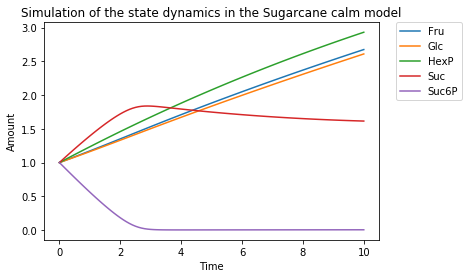

In [29]:
plt.plot(t_array,output[:,0],label='Fru')
plt.plot(t_array,output[:,1],label='Glc')
plt.plot(t_array,output[:,2],label='HexP')
plt.plot(t_array,output[:,3],label='Suc')
plt.plot(t_array,output[:,4],label='Suc6P')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title("Simulation of the state dynamics in the Sugarcane calm model")